# Lab 6


In [14]:
import boto3
from botocore.exceptions import ClientError
import json

def get_secret(secret_name):
    region_name = "us-east-1"

    # Create a Secrets Manager client
    session = boto3.session.Session()
    client = session.client(
        service_name='secretsmanager',
        region_name=region_name
    )

    try:
        get_secret_value_response = client.get_secret_value(
            SecretId=secret_name
        )
    except ClientError as e:
        raise e

    secret = get_secret_value_response['SecretString']
    
    return json.loads(secret)

In [15]:
import psycopg2

conn = psycopg2.connect(host=get_secret('postgresql')['host'],
                      user=get_secret('postgresql')['username'],
                      password = get_secret('postgresql')['password'],
                      dbname=get_secret('postgresql')['engine'])

cur = conn.cursor()

In [16]:
! pip install jupyter-ai-magics[all] -q

In [17]:
import warnings
warnings.simplefilter('ignore')

In [18]:
import os
os.environ["OPENAI_API_KEY"] = get_secret('openai')['api_key']

In [19]:
%load_ext jupyter_ai_magics

In [23]:
%%ai gpt4
what code should I use to look at year over year population growth for georgia

To produce output in markdown format, it assumes you have the necessary data on Georgia's population across the years. Typically, you would use a tool such as Python or R to analyze and compute the year over year population growth, then manually write the output in Markdown.

However, since the question is requesting the code only in markdown format, it's crucial to note that markdown is largely used for presenting and formatting text, rather than performing computations or analysis.

Here's an example of how you might present the information in Markdown after performing the calculations.

```markdown
| Year | Population | Annual Growth |
| ---- | ---------- | ------------- |
| 2016 | 10,310,371 | -             |
| 2017 | 10,429,379 | 1.15%         |
| 2018 | 10,519,475 | 0.86%         |
| 2019 | 10,617,423 | 0.93%         |
| 2020 | 10,711,908 | 0.89%         |
```

In the above, the population and annual growth data would be replaced with the actual values obtained from your data set. The annual growth percentage can be calculated as `((population_this_year - population_last_year)/population_last_year) x 100`.

For in-depth analysis, programming languages like Python, R, or SQL will be preferable. Markdown does not support direct execution of programming code outside a Jupyter Notebook or similar environment.

# Question #1

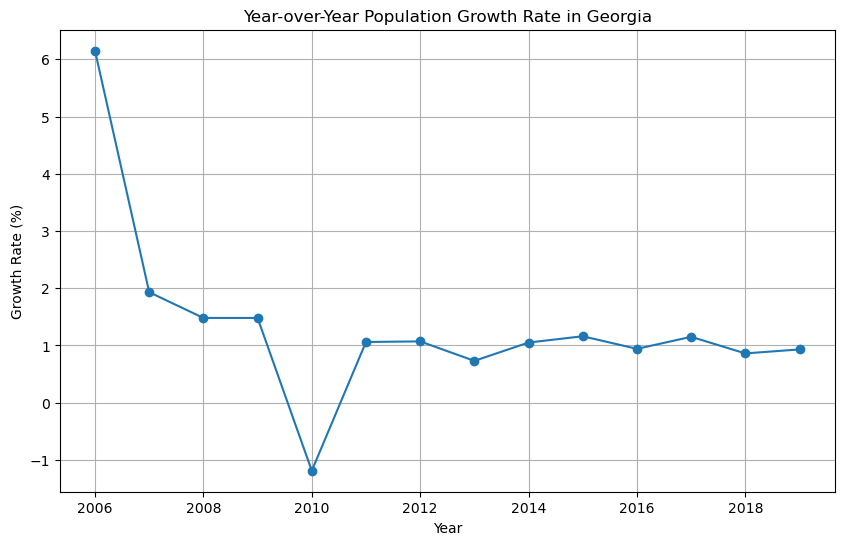

In [24]:
import pandas as pd
import matplotlib.pyplot as plt
import psycopg2

# Load SQL result into pandas
query_q1 = """
WITH yearly_pop AS (
    SELECT 
        p.year,
        p.pop,
        n.name
    FROM population p
    JOIN name n ON p.fips = n.fips
    WHERE n.name = 'Georgia'
    ORDER BY p.year
)
SELECT 
    year,
    pop,
    LAG(pop) OVER (ORDER BY year) AS prev_pop,
    ROUND(((pop::numeric - LAG(pop) OVER (ORDER BY year)) / LAG(pop) OVER (ORDER BY year)) * 100, 2) AS growth_rate_percent
FROM yearly_pop;
"""
df_pop = pd.read_sql(query_q1, conn)

# Plot growth rate
plt.figure(figsize=(10,6))
plt.plot(df_pop['year'], df_pop['growth_rate_percent'], marker='o', linestyle='-')
plt.title("Year-over-Year Population Growth Rate in Georgia")
plt.xlabel("Year")
plt.ylabel("Growth Rate (%)")
plt.grid(True)
plt.show()



# Q1 Code Explanation:

This code connects to a database, retrieves Georgia’s population data by year, and calculates the year-over-year growth rate using SQL. The results are loaded into a pandas DataFrame and then visualized with a line chart showing how Georgia’s population growth rate has changed over time. Each point on the graph represents the percentage increase or decrease in population compared to the previous year.

# Question #2

In [26]:
%%ai gpt4
provide me with a code to visualize the relationship of population and income for georgia

As mentioned before, Markdown is a formatting language used for text and content presentation. It does not support active code execution for data visualization or calculations. 

You may use programming languages such as Python, R, or Julia with data visualization libraries like Matplotlib, ggplot, or Plotly to perform such tasks. Once you have produced the chart, you can embed the image into Markdown. 

For instance, suppose you've saved your chart as 'georgia_pop_income_plot.png'. You can then display it in markdown using the following syntax:

```markdown
![Georgia Population vs Income plot](georgia_pop_income_plot.png)
```

If you're using Jupyter notebooks, which combine markdown and code, your Python code might look something like this:

```python
import matplotlib.pyplot as plt
import pandas as pd

# Assuming you have a DataFrame `df` with "Year", "Population" and "Income" data for Georgia
df = pd.read_csv('georgia_data.csv')  # replace 'georgia_data.csv' with your actual data file name

plt.figure(figsize=(10, 5))

plt.plot(df['Year'], df['Population'], label='Population')
plt.plot(df['Year'], df['Income'], label='Income')

plt.title('Year vs Population and Income for Georgia')
plt.xlabel('Year')
plt.ylabel('Population / Income')

plt.legend()
plt.grid(True)
plt.show()
```

After running this code, a plot will be generated displaying the relationship between Population and Income over the years in Georgia. This image could then be saved and referenced in Markdown as described before.

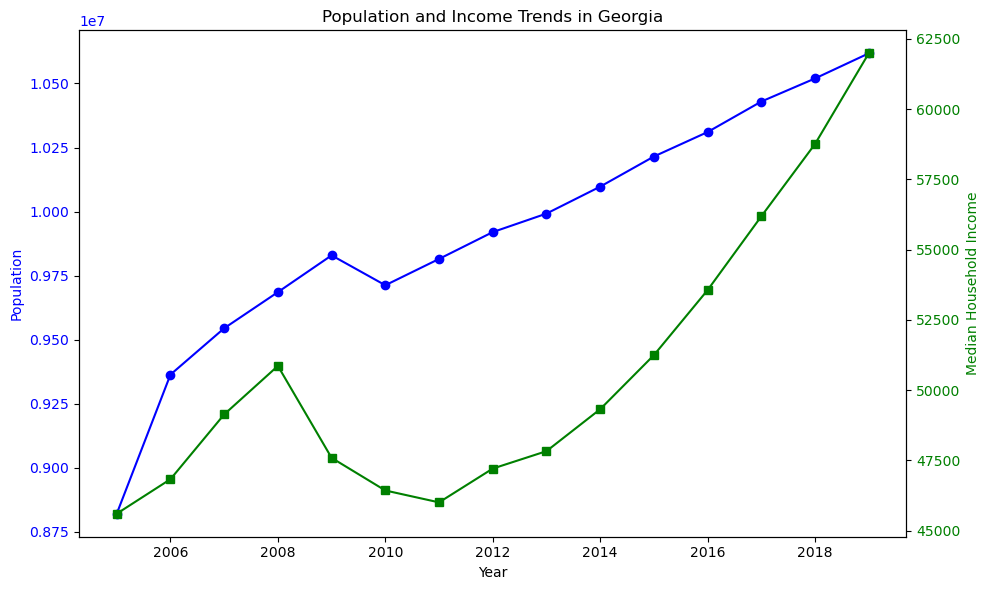

In [27]:
# Load SQL result into pandas
query_q2 = """
SELECT 
    p.year,
    p.pop,
    i.income,
    n.name
FROM population p
JOIN income i ON p.fips = i.fips AND p.year = i.year
JOIN name n ON p.fips = n.fips
WHERE n.name = 'Georgia'
ORDER BY p.year;
"""
df_income_pop = pd.read_sql(query_q2, conn)

# Plot dual-axis chart
fig, ax1 = plt.subplots(figsize=(10,6))

# Population line (left axis)
ax1.set_xlabel("Year")
ax1.set_ylabel("Population", color="blue")
ax1.plot(df_income_pop['year'], df_income_pop['pop'], color="blue", marker='o', label="Population")
ax1.tick_params(axis="y", labelcolor="blue")

# Income line (right axis)
ax2 = ax1.twinx()
ax2.set_ylabel("Median Household Income", color="green")
ax2.plot(df_income_pop['year'], df_income_pop['income'], color="green", marker='s', label="Income")
ax2.tick_params(axis="y", labelcolor="green")

plt.title("Population and Income Trends in Georgia")
fig.tight_layout()
plt.show()


# Q2 Explanation:

This code retrieves Georgia’s yearly population and median household income data from the database and displays them together on a dual-axis chart. The blue line represents population growth, while the green line shows changes in income over the same years. By comparing the two trends, the visual helps illustrate how Georgia’s economic growth has related to its population changes over time.


# Question #3

In [28]:
%%ai gpt4
provide me with a code to visualize the population increases in georgia

As mentioned earlier, Markdown is a light-weight markup language that does not have the capability to execute code for data visualization. However, if you're using environments like Jupyter Notebook, you can use a combination of Python and Markdown to visualize data. Here is sample Python code:

```python
import matplotlib.pyplot as plt
import pandas as pd

# Assuming you have a DataFrame `df` with "Year" and "Population" data for Georgia
df = pd.read_csv('georgia_pop.csv')  # replace with your actual data file

plt.figure(figsize=(10, 5))
plt.plot(df['Year'], df['Population'], label='Population', marker='o')

plt.title('Year vs Population for Georgia')
plt.xlabel('Year')
plt.ylabel('Population')

plt.legend()
plt.grid(True)
plt.show()
```
After running this code in a Jupyter cell, a plot will be generated to visualize population growth in Georgia over the years. This environment can render the plot within the notebook itself.

To include this graph in a pure Markdown environment, first, save the plot as an image file and then insert the image using Markdown syntax:

```markdown
![Georgia Population Growth](path_to_your_image.png)
```
Replace `path_to_your_image.png` with the actual path to your saved image file. 

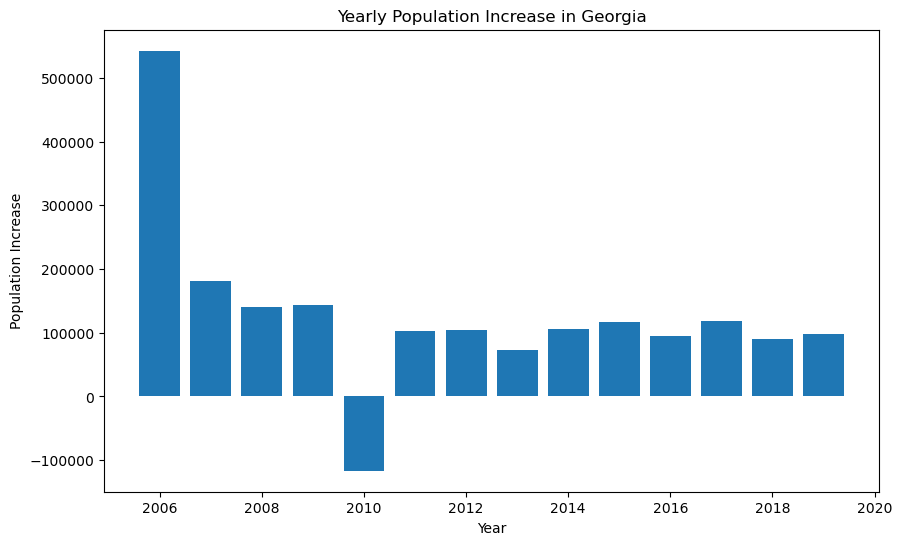

In [29]:
# Load SQL result for all years (for plotting)
query_q3 = """
WITH yearly_pop AS (
    SELECT 
        p.year,
        p.pop,
        LAG(p.pop) OVER (ORDER BY p.year) AS prev_pop,
        n.name
    FROM population p
    JOIN name n ON p.fips = n.fips
    WHERE n.name = 'Georgia'
)
SELECT 
    year,
    pop,
    (pop - prev_pop) AS pop_increase
FROM yearly_pop
WHERE prev_pop IS NOT NULL
ORDER BY year;
"""
df_pop_increase = pd.read_sql(query_q3, conn)

# Plot population increase
plt.figure(figsize=(10,6))
plt.bar(df_pop_increase['year'], df_pop_increase['pop_increase'])
plt.title("Yearly Population Increase in Georgia")
plt.xlabel("Year")
plt.ylabel("Population Increase")
plt.show()


# Q3 Explanation:

This code pulls Georgia’s yearly population data from the database and calculates how much the population increased each year compared to the previous one. It then creates a bar chart where each bar represents the total population gain for that year. The visualization makes it easy to see which years had the largest increases and how Georgia’s population growth has varied over time.


# End of Lab